# MINE 4201 - Laboratorio 0

Este notebook esta basado en el material de introducción a pandas disponible en 

https://pandas.pydata.org/docs/getting_started/

El laboratorio 0 esta diseñado para familiarizar al estudiante con la ejecución de cuadernos de jupyter notebook y pandas, una librería de python para la manipulación y análisis de datos.

La librería de pandas maneja datos tabulares (filas y columnas) usando como abstracción un [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) que tiene filas y columnas.
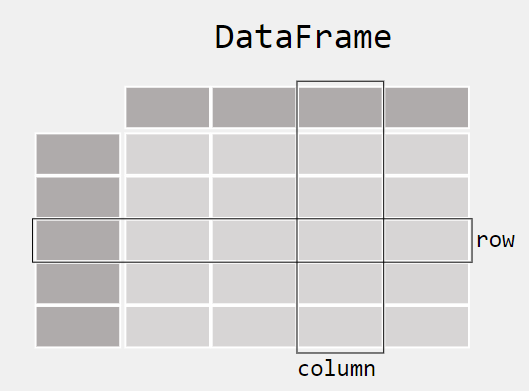





In [29]:
import pandas as pd
import csv
import numpy as np
%matplotlib inline

## Carga de datos a DataFrame y exploración inicial de datos

Para el ejercicio de familiarización con pandas vamos a utilizar el dataset de Book-Crossing, este dataset fue recolectado por Cai-Nicolas Ziegler en Agosto a Septiembre de 2004. Para más información sobre la plataforma puede acceder a la comunidad de [Book-Crossing](https://www.bookcrossing.com/?). 
Los datos contienen información acerca de 278,858 usuarios, con 1,149,780 ratings (opiniones) sobre 271,379 libros.

Los archivos pertinentes están descargados en la carpeta data en formato csv. Puede encontrar más información acerca del dataset en este [sitio](http://www2.informatik.uni-freiburg.de/~cziegler/BX/)

En las siguientes celdas, se cargan los archivos de ratings, libros e usuarios en un DataFrame



In [2]:
df_ratings= pd.read_csv('data/BX-Book-Ratings.csv',sep=';',quotechar='"', encoding = 'ISO-8859-1')

In [3]:
df_books= pd.read_csv('data/BX-Books.csv',sep=';',quotechar='"', escapechar='\\', encoding = 'ISO-8859-1')

In [4]:
df_users = pd.read_csv('data/BX-Users.csv',sep=';',quotechar='"', escapechar='\\', encoding = 'ISO-8859-1')

Un DataFrame de pandas es una estructura 2-dimensional de filas y columnas. Se puede imprimir por la salida el contenido de un dataframe simplemente con una instrucción que llame al dataframe. También se pueden inspeccionar las primeras o últimas n filas del DataFrame utilizando el método head() o tail(), o realizar un muestreo de n líneas con el método sample()

In [5]:
type(df_users)

pandas.core.frame.DataFrame

In [6]:
df_users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [7]:
#Tupla python que contiene las dimensiones del dataframe
df_users.shape

(278858, 3)

In [8]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
df_users.tail()

,User-ID,Location,Age
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


In [10]:
df_users.sample(8)

,User-ID,Location,Age
218231,218232,"templeton, california, usa",52.0
249125,249126,"aachen, nordrhein-westfalen, germany",26.0
151944,151945,"houston, texas, usa",55.0
19302,19303,"san jose, california, usa",48.0
71531,71532,"hyattsville, maryland, usa",28.0
124923,124924,"pattaya, cho, thailand",0.0
112173,112174,"shreveport, louisiana, usa",31.0
1663,1664,"chattonoga, georgia, usa",14.0


In [22]:
#TODO: 
#Utilice las siguientes líneas para revisar las primeras 8 líneas, las últimas 8 líneas y un muestreo del dataframe de libros (df_books) 

In [ ]:
df_books.?

In [ ]:
df_books.?

In [ ]:
df_books.?

## Atributos de un DataFrame

El índice de un dataframe hace referencia a la primera columna en negrilla, es un identificador de cada fila

In [12]:
df_users.index

RangeIndex(start=0, stop=278858, step=1)

Las columnas de un DataFrame también tienen un identificador

In [13]:
df_users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

Por último, cada columna tiene un tipo de dato inferido por la libreria al momento de realizar la carga

In [14]:
df_users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

## Selección y manejo de índices

Es posible seleccionar información de los DataFrame a partir de los índices de filas y columnas (primera fila y primera columna cuando se imprime un dataframe). Estos índices permiten acceder a un subconjunto del DataFrame principal y cambiar la información almacenada en el DataFrame. 

### Selección de columnas

Se puede seleccionar una columna mediante el uso de los corchetes cuadrados. En las siguientes celdas accedemos a la columna User-ID, o a un conjunto de columnas. Acceder a una sola columna es un objeto de tipo [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html), acceder a múltiples columnas resulta en un objeto tipo DataFrame
 

In [18]:
df_users['User-ID']

0              1
1              2
2              3
3              4
4              5
           ...  
278853    278854
278854    278855
278855    278856
278856    278857
278857    278858
Name: User-ID, Length: 278858, dtype: int64

In [35]:
#Cuando el nombre de la columna es un nombre de atributo válido de python, puede ser accedida como atributo
df_users.Age

0          NaN
1         18.0
2          NaN
3         17.0
4          NaN
          ... 
278853     NaN
278854    50.0
278855     NaN
278856     NaN
278857     NaN
Name: Age, Length: 278858, dtype: float64

In [36]:
df_users['User-ID'].shape

(278858,)

In [37]:
type(df_users['User-ID'])

pandas.core.series.Series

In [38]:
type(df_users.Age)

pandas.core.series.Series

In [39]:
df_users[['User-ID', 'Location']]

,User-ID,Location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"
...,...,...
278853,278854,"portland, oregon, usa"
278854,278855,"tacoma, washington, united kingdom"
278855,278856,"brampton, ontario, canada"
278856,278857,"knoxville, tennessee, usa"


In [27]:
df_users[['User-ID', 'Location']].shape

(278858, 2)

In [28]:
type(df_users[['User-ID', 'Location']])

pandas.core.frame.DataFrame

### Filtrar filas y columnas por condiciones
Se utiliza también la sintaxis de los corchetes cuadrados, 
Quiero acceder a las filas que tienen usuarios mayores de 60 años y guardarlo en el DataFrame df_users_senior

In [44]:
df_users_senior=df_users[df_users['Age']>60]

In [45]:
df_users_senior

,User-ID,Location,Age
5,6,"santa monica, california, usa",61.0
143,144,"cape girardeau, missouri, usa",62.0
147,148,"essex, england, united kingdom",63.0
164,165,"olympia, washington, usa",62.0
171,172,"rio de janeiro, rio de janeiro, brazil",66.0
...,...,...,...
278774,278775,"melrose park, illinois, usa",64.0
278806,278807,"pollock pines, california, usa",66.0
278809,278810,"perth, western australia, australia",62.0
278820,278821,"clarence, new york, usa",70.0


La condición `df_users['Age']>60` genera un vector binario, que es utilizado como una máscara binaria para acceder solamente las posiciones del DataFrame que cumplen con la condición

In [50]:
df_users['Age']>60

0         False
1         False
2         False
3         False
4         False
          ...  
278853    False
278854    False
278855    False
278856    False
278857    False
Name: Age, Length: 278858, dtype: bool

In [47]:
type(df_users['Age']>60)

pandas.core.series.Series

In [51]:
#Negación de la condición
~(df_users['Age']>60)

0         True
1         True
2         True
3         True
4         True
          ... 
278853    True
278854    True
278855    True
278856    True
278857    True
Name: Age, Length: 278858, dtype: bool

In [52]:
#Acceso a las filas 
df_users[~(df_users['Age']>60)]

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [56]:
# Comparación contra nan
df_users[df_users['Age'].isna()]

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
2,3,"moscow, yukon territory, russia",NaN
4,5,"farnborough, hants, united kingdom",NaN
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
...,...,...,...
278849,278850,"sergnano, lombardia, italy",NaN
278853,278854,"portland, oregon, usa",NaN
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
#TODO: 
#Utilice las siguiente líneas para guardar en un nuevo DataFrame llamado df_books_old los libros que fueron publicados antes de 1900 y se conoce su año de publicación (diferente de 0)

In [ ]:
df_books_old = df_books[? ]